In [1]:
# !pip install pdfplumber
# ! pip install gensim
# !pip uninstall pandas
# !pip install pandas


## <b id='1'>1 <span style='color:#ffa64d'>|</span> Importing The Dependencies.</b> 

In [24]:
import pdfplumber
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report,roc_curve, auc
from sklearn.preprocessing import label_binarize,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, GlobalMaxPool1D, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


## <b id='1'>2 <span style='color:#ffa64d'>|</span> Data preprocessing.</b> 

<p>Here you do some data preprocessing read the data directory and pdf file then grab all words from the pdf and directory name as labels.</p>

In [3]:
data_dir = 'dataset/data/data'

def extract_text_from_pdfs(dir):
    texts = []
    labels = []
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith('.pdf'):
                file_path = os.path.join(subdir, file)
                with pdfplumber.open(file_path) as pdf:
                    text = ""
                    for page in pdf.pages:
                        text += page.extract_text()
                    label = os.path.basename(subdir)
                    texts.append(text)
                    labels.append(label)
    return texts, labels

texts, labels = extract_text_from_pdfs(data_dir)

print(texts[0][:1000])  
print(labels[0])

STORE KEEPER / PRODUCTION CO-ORDINATOR
Summary
To develop and find a place in the industry where I can utilize my skills through serving efficiently and with complete honesty, integrity and hard
work for personal and organizational growth.
Highlights
Ms-Office (Excel, Word, Pivot & Vlookup) & Internet applications.
Inventory tracking
Customer Service Oriented Vendor management
Shipment consolidations planning
Merchandising Warehouse and fulfillment
Imports and exports
Production Co-ordination
Works well independently
Store Managing
Accomplishments
Credentials Institution/University Year of Completion
B.Com C.K.Thakur College of Arts & Commerce Mumbai University 2008
HSC S.E.S College / Mumbai University 2005
SSC New English School / Mumbai University 2003.
Experience
Store Keeper / Production Co-ordinator 03/2014 to Current Company Name City , State
Designation: Store Keeper / Production Co-ordinator
Key Responsibilities:
Maintained store facilities to ensure smooth functioning - Made 

<p>Converting texts into Computer readable type  into numerical feature vectors. Before that spilt data into train and test section.</p>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## <b id='1'>3 <span style='color:#ffa64d'>|</span> Data Visualization.</b> 

<p>we can see here data distribution of resume categories</p>

/home/muhib/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


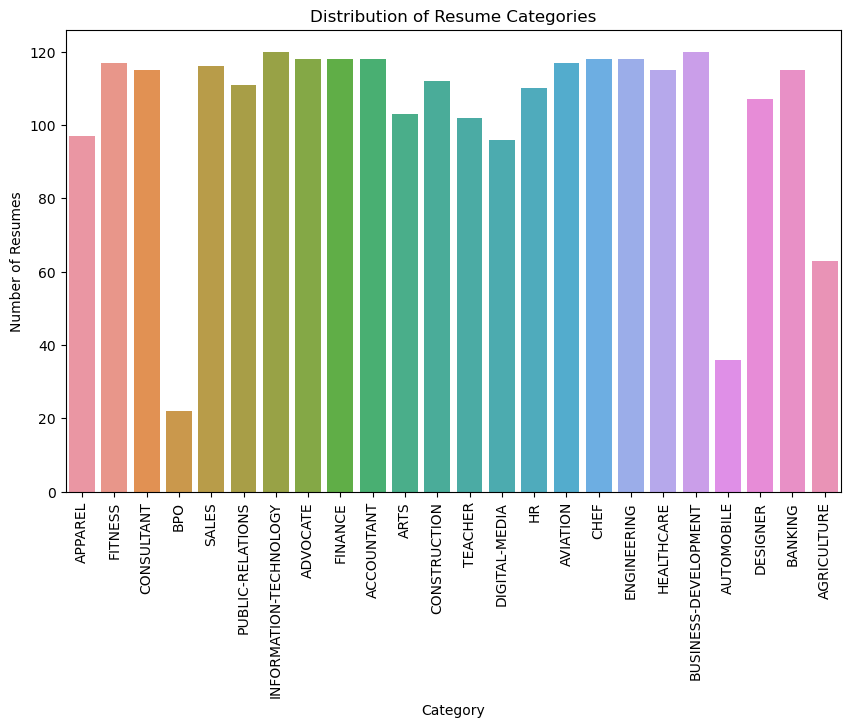

In [6]:
category_counts = Counter(labels)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.title("Distribution of Resume Categories")
plt.xlabel("Category")
plt.ylabel("Number of Resumes")
plt.xticks(rotation=90)
plt.show()

<p>PCA reduces the dimensionality of the data while preserving as much variance as possible. it looks like good here donot need many changes</p>

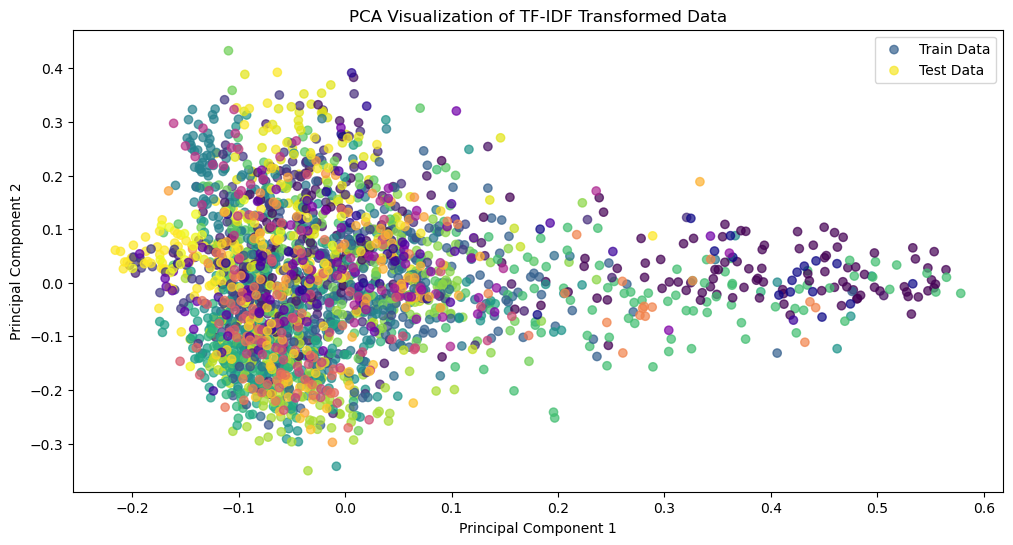

In [27]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

plt.figure(figsize=(12, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, cmap='viridis', alpha=0.7, label='Train Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, cmap='plasma', alpha=0.7, label='Test Data')
plt.title('PCA Visualization of TF-IDF Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

<p>Another way to visualize the transformed data is by using a 2D histogram or heatmap to show the density of data points.</p>

/home/muhib/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhib/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


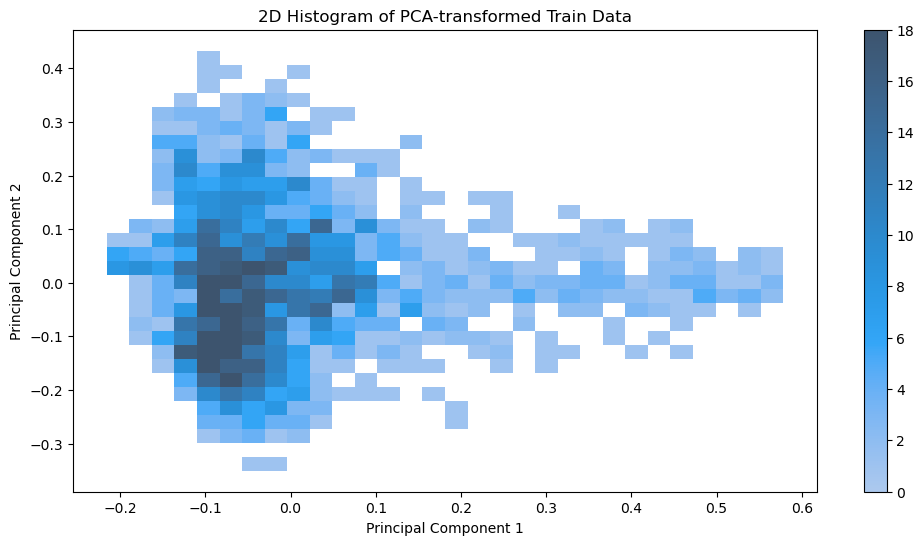

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], bins=30, pmax=0.9, cbar=True)
plt.title('2D Histogram of PCA-transformed Train Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## <b id='1'> <span style='color:#ffa64d'>|</span> Creating models and result analysis</b> 

<p>Lets start from support vectore machine</p>

In [29]:
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.704225352112676
                        precision    recall  f1-score   support

            ACCOUNTANT       0.85      0.94      0.89        18
              ADVOCATE       0.58      0.52      0.55        21
           AGRICULTURE       0.71      0.42      0.53        12
               APPAREL       0.75      0.56      0.64        16
                  ARTS       0.71      0.43      0.54        23
            AUTOMOBILE       1.00      0.10      0.18        10
              AVIATION       0.78      0.88      0.82        24
               BANKING       0.56      0.83      0.67        18
                   BPO       0.00      0.00      0.00         3
  BUSINESS-DEVELOPMENT       0.41      0.63      0.50        19
                  CHEF       0.84      0.91      0.87        23
          CONSTRUCTION       0.83      0.95      0.89        21
            CONSULTANT       0.75      0.36      0.49        25
              DESIGNER       0.95      0.90      0.92        20
         DI

/home/muhib/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhib/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhib/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p>
   The overall accuracy of 70.4% suggests the model is reasonably good but has room for improvement.
Some classes are predicted much better than others. This could be due to various reasons such as class imbalance, differences in feature distributions, or insufficient data for certain classes.
The classes with low scores might benefit from more data or better feature engineering to improve model performance.
</p>

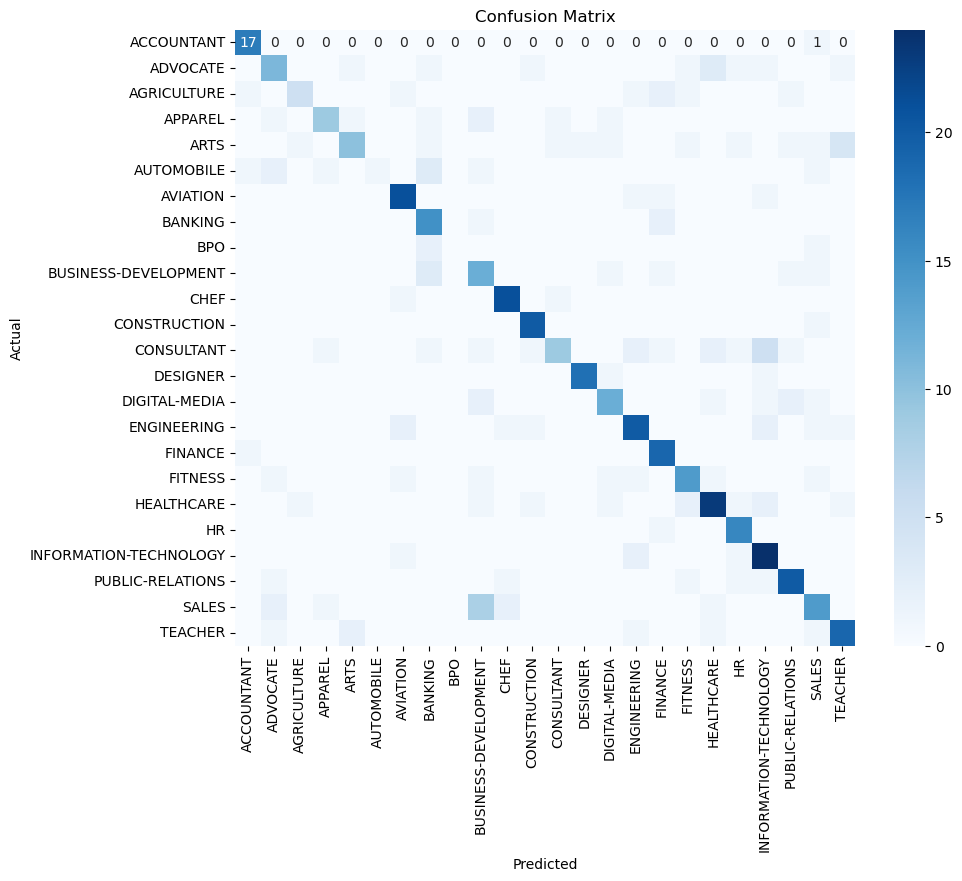

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=sorted(set(y_test)), columns=sorted(set(y_test)))

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<p>The confusion matrix gives you detailed insight into the model's performance by showing how often each class was correctly or incorrectly predicted.</p>

<p>Lets try some other ml models how it works</p>

In [30]:
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'NaiveBayes': MultinomialNB(),
    'KNeighbors': KNeighborsClassifier()
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
    },
    'NaiveBayes': {
        'alpha': [0.5, 1.0, 2.0],
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
    }
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_tfidf, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_}\n")

best_model_name, best_model = max(best_models.items(), key=lambda item: item[1].score(X_test_tfidf, y_test))
y_pred = best_model.predict(X_test_tfidf)

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.6859853423287724



KeyboardInterrupt: 

In [31]:

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [33]:

# def create_model(input_dim, num_units=128, dropout_rate=0.5):
#     model = Sequential()
#     model.add(Dense(num_units, activation='relu', input_shape=(input_dim,)))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(num_units // 2, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))
    
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# num_units_list = [128, 256]
# dropout_rate_list = [0.3, 0.5]
# batch_size_list = [32, 64]
# epochs_list = [10, 20]

# best_accuracy = 0
# best_params = None
# best_model = None

# for num_units in num_units_list:
#     for dropout_rate in dropout_rate_list:
#         for batch_size in batch_size_list:
#             for epochs in epochs_list:
#                 print(f"Training model with {num_units} units, {dropout_rate} dropout, {batch_size} batch size, and {epochs} epochs")
                
#                 model = create_model(input_dim=X_train_tfidf.shape[1], num_units=num_units, dropout_rate=dropout_rate)
#                 model.fit(X_train_tfidf, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)
                
#                 y_pred = np.argmax(model.predict(X_test_tfidf), axis=1)
#                 accuracy = accuracy_score(y_test_encoded, y_pred)
                
#                 print(f"Test Accuracy: {accuracy}")
                
#                 if accuracy > best_accuracy:
#                     best_accuracy = accuracy
#                     best_params = (num_units, dropout_rate, batch_size, epochs)
#                     best_model = model

# print(f"Best Model Parameters: {best_params}")
# print(f"Best Test Accuracy: {best_accuracy}")

# y_pred = np.argmax(best_model.predict(X_test_tfidf), axis=1)
# print(classification_report(y_test_encoded, y_pred))


Training model with 128 units, 0.3 dropout, 32 batch size, and 10 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-22 19:30:22.440007: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35760000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.6116700201207244
Training model with 128 units, 0.3 dropout, 32 batch size, and 20 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-22 19:30:28.225001: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35760000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.6177062374245473
Training model with 128 units, 0.3 dropout, 64 batch size, and 10 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-22 19:30:37.738706: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35760000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.5875251509054326
Training model with 128 units, 0.3 dropout, 64 batch size, and 20 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-22 19:30:41.090998: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35760000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.6257545271629779
Training model with 128 units, 0.5 dropout, 32 batch size, and 10 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-22 19:30:46.756228: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35760000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.6156941649899397
Training model with 128 units, 0.5 dropout, 32 batch size, and 20 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.6177062374245473
Training model with 128 units, 0.5 dropout, 64 batch size, and 10 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.5835010060362174
Training model with 128 units, 0.5 dropout, 64 batch size, and 20 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.6197183098591549
Training model with 256 units, 0.3 dropout, 32 batch size, and 10 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.6297786720321932
Training model with 256 units, 0.3 dropout, 32 batch size, and 20 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.6297786720321932
Training model with 256 units, 0.3 dropout, 64 batch size, and 10 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.6297786720321932
Training model with 256 units, 0.3 dropout, 64 batch size, and 20 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.6297786720321932
Training model with 256 units, 0.5 dropout, 32 batch size, and 10 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.6277665995975855
Training model with 256 units, 0.5 dropout, 32 batch size, and 20 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.6398390342052314
Training model with 256 units, 0.5 dropout, 64 batch size, and 10 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.6297786720321932
Training model with 256 units, 0.5 dropout, 64 batch size, and 20 epochs


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.6156941649899397
Best Model Parameters: (256, 0.5, 32, 20)
Best Test Accuracy: 0.6398390342052314
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.42      0.52      0.47        21
           2       0.44      0.33      0.38        12
           3       0.60      0.56      0.58        16
           4       0.62      0.43      0.51        23
           5       0.33      0.10      0.15        10
           6       0.77      0.71      0.74        24
           7       0.42      0.72      0.53        18
           8       0.00      0.00      0.00         3
           9       0.36      0.53      0.43        19
          10       0.91      0.87      0.89        23
          11       0.95      0.90      0.93        21
          12       0.50      0.32      0.39        25
          13       0.89      0.80      0.84      

In [34]:

# tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
# tokenizer.fit_on_texts(X_train)

# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# X_train_pad = pad_sequences(X_train_seq, maxlen=200)
# X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# model = Sequential()
# model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
# model.add(LSTM(128, return_sequences=True))
# model.add(GlobalMaxPool1D())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

# y_pred = np.argmax(model.predict(X_test_pad), axis=1)
# accuracy = accuracy_score(y_test_encoded, y_pred)
# print(f"Test Accuracy: {accuracy}")
# print(classification_report(y_test_encoded, y_pred))


Epoch 1/10


/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.0491 - loss: 3.1729 - val_accuracy: 0.1055 - val_loss: 3.1535
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.0858 - loss: 3.0973 - val_accuracy: 0.0905 - val_loss: 3.0236
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.1023 - loss: 3.0090 - val_accuracy: 0.2161 - val_loss: 2.8836
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.1757 - loss: 2.8561 - val_accuracy: 0.2663 - val_loss: 2.6296
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.2257 - loss: 2.5671 - val_accuracy: 0.3065 - val_loss: 2.3722
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.3519 - loss: 2.2629 - val_accuracy: 0.3970 - val_loss: 2.2859
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.4101 - loss: 2.0208 - val_accuracy: 0.3869 - val_loss: 2.1562
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.4431 - loss: 1.7976 - val_accuracy: 0.3769 - val_loss: 

/home/muhib/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhib/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhib/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


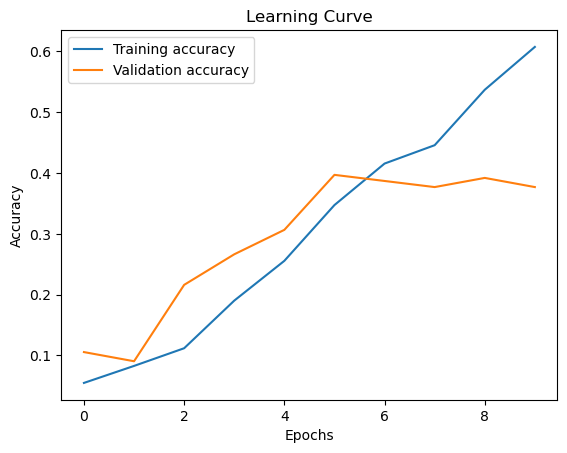

In [35]:
# plt.plot(history.history['accuracy'], label='Training accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()

In [36]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = 200 
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



In [37]:

embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/home/muhib/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:


early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5, 
    min_delta=0.001,  
    restore_best_weights=True 
)

history = model.fit(
    X_train_pad, 
    y_train_encoded, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1, 
    callbacks=[early_stopping]  
)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.0555 - loss: 3.7429 - val_accuracy: 0.0402 - val_loss: 3.5408
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.0529 - loss: 3.5072 - val_accuracy: 0.0804 - val_loss: 3.3617
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.0641 - loss: 3.3403 - val_accuracy: 0.1005 - val_loss: 3.2093
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.0906 - loss: 3.2135 - val_accuracy: 0.1106 - val_loss: 3.0710
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.1117 - loss: 3.1056 - val_accuracy: 0.1407 - val_loss: 2.9509
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.1302 - loss: 3.0221 - val_accuracy: 0.1910 - val_loss: 2.8466
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.1512 - loss: 2.9552 - val_accuracy: 0.1859 - val_loss: 2.7959
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.1707 - loss: 2.8546 - 

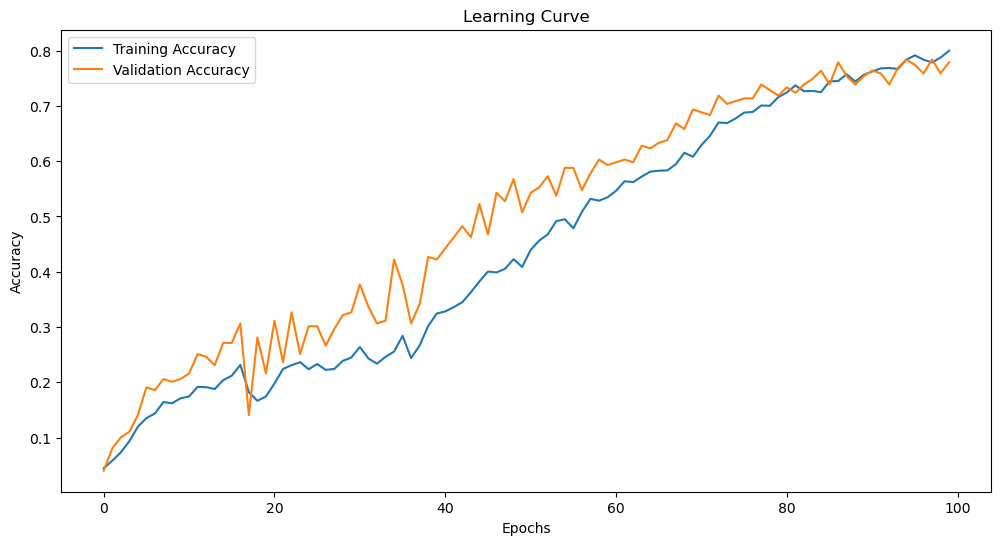

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

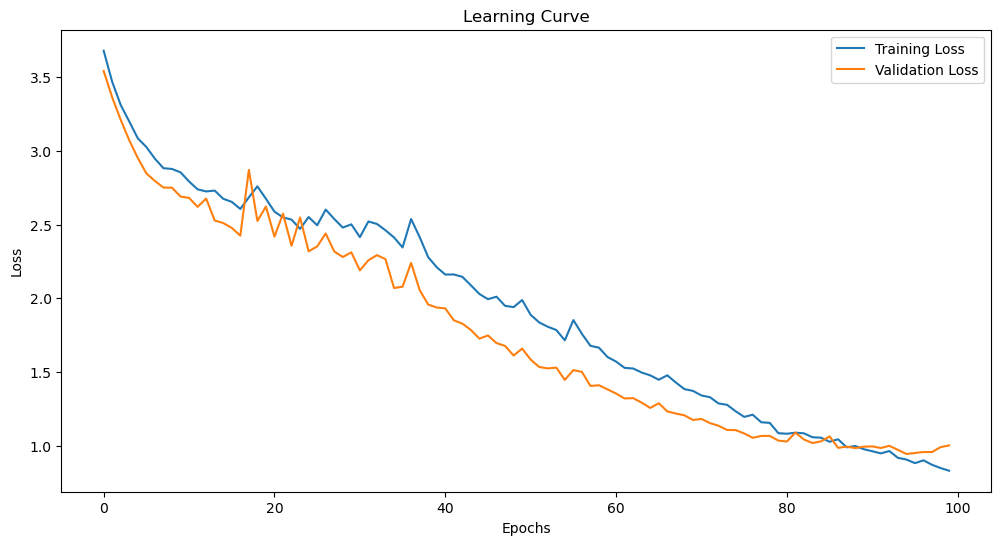

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [41]:
model.save('best_model.keras')
print("Model saved to 'best_model.keras'")


Model saved to 'best_model.keras'


In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle


tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)


In [44]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Create and fit the LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Save the LabelEncoder to a file
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

print("LabelEncoder saved to 'label_encoder.pkl'")


LabelEncoder saved to 'label_encoder.pkl'
